# Exploratory Data Analysis

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
combined_data = pd.concat([sheet1, sheet2], ignore_index = True)
combined_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
1067367,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067368,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
1067369,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


### Total Customer

In [23]:
combined_data['CustomerID'] = combined_data['Customer ID']

In [27]:
combined_data.CustomerID.unique().shape

(5943,)

### Total Invoices

In [29]:
combined_data.Invoice.unique().shape

(53628,)

### Total StockCodes

In [31]:
combined_data.StockCode	.unique().shape

(5305,)

### Total Items

In [33]:
combined_data.Description.unique().shape

(5699,)

### Total Countries

In [35]:
combined_data.Country.unique().shape

(43,)

In [335]:
print("Dataset Info:\n")
combined_data.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


### Missing Values

In [337]:
print(combined_data.isnull().sum())


Missing Values:

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


### Drop the duplicates from the dataset

In [339]:
combined_data = combined_data.drop_duplicates()
combined_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1044843,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
1044844,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
1044845,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
1044846,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


### Removing the rows which have missing Customer ID

In [341]:
data_cleaned = combined_data.dropna(subset = ['Customer ID'])
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1044843,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
1044844,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
1044845,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
1044846,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


### Replace the missing Description as 'Unknown'

In [345]:
data_cleaned['Description'].fillna('Unknown')
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
1044843,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
1044844,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
1044845,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
1044846,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [347]:
data_cleaned = data_cleaned.reset_index(drop = True)
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


### Checked the negative values in the 'Quantity' and 'Price' columns

In [349]:
print('No. of negative values in quantity : ', (data_cleaned.Quantity < 0).sum())
print('No. of negative values in price : ', (data_cleaned.Price < 0).sum())

Number of negative values in quantity :  18390
Number of negative values in price :  0


In [351]:
data_cleaned = data_cleaned[(data_cleaned['Quantity'] >= 0) & (data_cleaned['Price'] >= 0)]
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


### Filter the data outside the period 01.12.2009 to 09.12.2011

In [353]:
(data_cleaned.InvoiceDate >= '2011-12-09').sum()

611

In [355]:
(data_cleaned.InvoiceDate <= '2009-12-01').sum()

0

In [357]:
data_cleaned = data_cleaned[(data_cleaned['InvoiceDate'] <= '2011-12-09') & (data_cleaned['InvoiceDate'] >= '2009-12-01')]
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom


In [359]:
(data_cleaned.InvoiceDate >= '2011-12-09').sum()

0

In [361]:
(data_cleaned.InvoiceDate <= '2009-12-01').sum()

0

In [363]:
data_cleaned.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [365]:
data_cleaned.describe()


Basic Statistics:



,Quantity,InvoiceDate,Price,Customer ID
count,778884.000000,778884,778884.000000,778884.000000
mean,13.401420,2011-01-02 19:22:06.269046784,3.218741,15320.834942
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-07-02 13:36:00,1.250000,13971.000000
50%,6.000000,2010-12-02 12:59:00,1.950000,15248.000000
75%,12.000000,2011-08-01 10:26:00,3.750000,16794.000000
max,74215.000000,2011-12-08 20:01:00,10953.500000,18287.000000
std,114.327302,NaN,29.686356,1695.397467


In [367]:
data_cleaned.describe(include = 'object')

,Invoice,StockCode,Description,Country
count,778884,778884,778884,778884
unique,36934,4630,5282,41
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,5022,5016,700004


In [369]:
data_cleaned.columns


Available Columns:



Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

### Divide the 'InvoiceDate' column into 'InvoiceYear' and 'InvoiceMonth'

In [373]:
data_cleaned = data_cleaned.copy()
data_cleaned['InvoiceYear'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['InvoiceMonth'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,11
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,11
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11


### Revenue

In [377]:
data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['Price']
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,25.20
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,11,15.90
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,11,15.00
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,50.40


### Count of Customer ID's and group by Country and InvoiceYear

In [379]:
customerid_country = data_cleaned.groupby(['Country', 'InvoiceYear'])['Customer ID'].count().sort_values(ascending=False).reset_index()
customerid_country

,Country,InvoiceYear,Customer ID
0,United Kingdom,2010,346531
1,United Kingdom,2011,325338
2,United Kingdom,2009,28135
3,Germany,2011,8433
4,EIRE,2010,8172
...,...,...,...
90,Saudi Arabia,2011,9
91,Denmark,2009,8
92,Finland,2009,4
93,Sweden,2009,2


[]

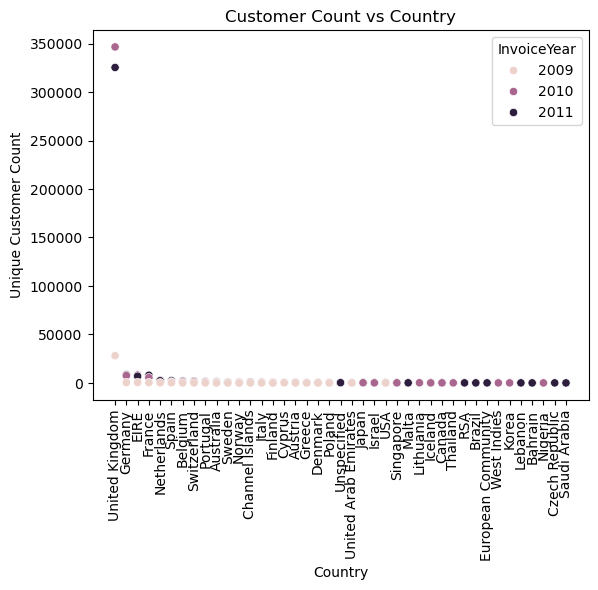

In [381]:
customerid_vs_country = sns.scatterplot(x = 'Country', y = 'Customer ID', hue = 'InvoiceYear', data = customerid_country)
customerid_vs_country.set_xlabel('Country')
customerid_vs_country.set_ylabel('Customer Count')
customerid_vs_country.set_title('Customer Count vs Country')
plt.xticks(rotation=90)
plt.plot()

### Total Revenue of each country (high to low)

In [385]:
country_revenue = data_cleaned.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()
country_revenue

,Country,Revenue
0,United Kingdom,1.420969e+07
1,EIRE,6.165705e+05
2,Netherlands,5.540381e+05
3,Germany,4.233300e+05
4,France,3.485015e+05
5,Australia,1.692835e+05
6,Spain,1.083325e+05
7,Switzerland,1.000619e+05
8,Sweden,9.151582e+04
9,Denmark,6.858069e+04


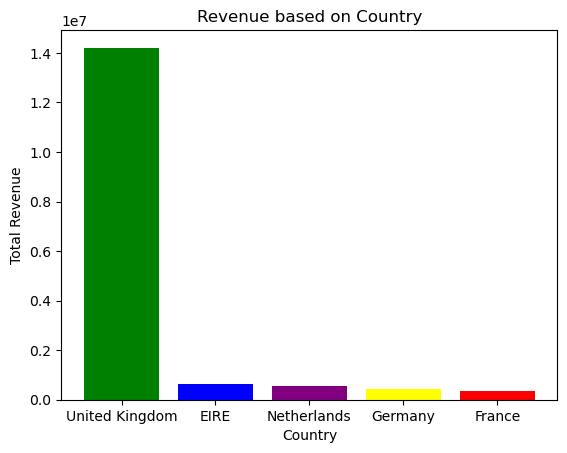

In [389]:
country_revenue = country_revenue.head()
colors = ['Green', 'Blue', 'Purple', 'Yellow', 'Red']
plt.bar(country_revenue['Country'], country_revenue['Revenue'], color = colors)
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Revenue VS Country')
plt.show()

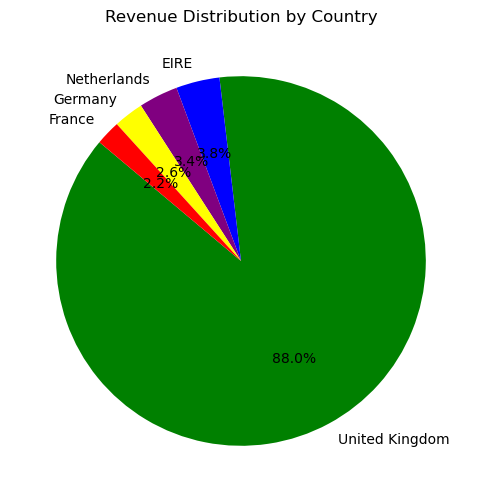

In [515]:
country_revenue = country_revenue.head()
colors = ['Green', 'Blue', 'Purple', 'Yellow', 'Red']
plt.figure(figsize=(8, 6))
plt.pie(country_revenue['Revenue'], labels=country_revenue['Country'], colors=colors, autopct='%1.1f%%',startangle=140)
plt.title('Revenue Distribution by Country')
plt.show()

### Total quantity of each country

In [393]:
country_quantity = data_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False).reset_index()
country_quantity

,Country,Quantity
0,United Kingdom,8458784
1,Netherlands,384519
2,EIRE,318271
3,France,270183
4,Denmark,237471
5,Germany,224293
6,Australia,104067
7,Sweden,88495
8,Switzerland,52228
9,Spain,50318


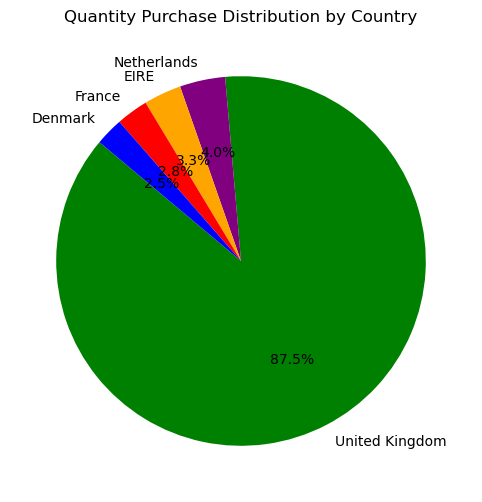

In [519]:
country_quantity = country_quantity.head()
colors = ['Green','Purple',  'Orange', 'Red', 'Blue']
plt.figure(figsize=(8, 6))
plt.pie(country_quantity['Quantity'], labels=country_quantity['Country'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Quantity Purchase Distribution by Country')
plt.show()

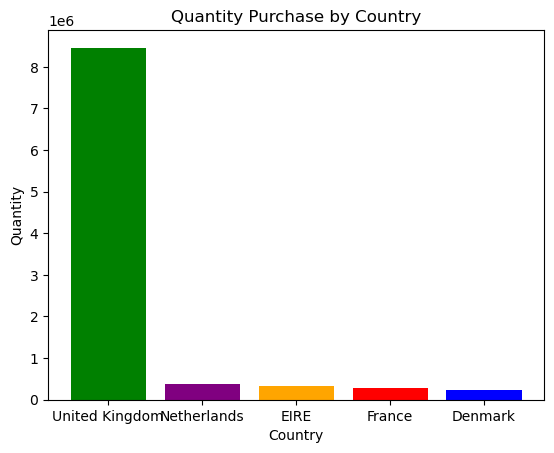

In [521]:
country_quantity = country_quantity.head()
colors = ['Green', 'Purple', 'Orange', 'Red', 'Blue']
plt.bar(country_quantity['Country'], country_quantity['Quantity'], color = colors)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title('Quantity Purchase by Country')
plt.show()

### Count of quantity and group by Customer ID and Country

In [399]:
customerid_quantity = data_cleaned.groupby(['Customer ID', 'Country'])['Quantity'].sum().sort_values(ascending=False).reset_index().head(100)
customerid_quantity

,Customer ID,Country,Quantity
0,14646.0,Netherlands,367833
1,13902.0,Denmark,220600
2,13694.0,United Kingdom,188201
3,18102.0,United Kingdom,181501
4,14156.0,EIRE,164325
...,...,...,...
95,14667.0,United Kingdom,11939
96,16746.0,United Kingdom,11900
97,14849.0,United Kingdom,11838
98,12731.0,France,11641


[]

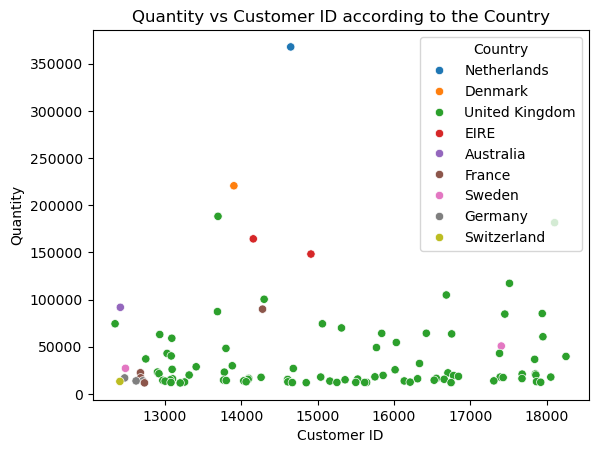

In [401]:
customerid_vs_quantity = sns.scatterplot(x = 'Customer ID', y = 'Quantity', hue = 'Country', data = customerid_quantity)
customerid_vs_quantity.set_xlabel('Customer ID')
customerid_vs_quantity.set_ylabel('Quantity')
customerid_vs_quantity.set_title('Quantity vs Customer ID')
plt.plot()

### Total revenue of each Customer

In [405]:
customerid_revenue = data_cleaned.groupby('Customer ID')['Revenue'].sum().sort_values(ascending=False).head(10)
customerid_revenue

Customer ID
18102.0    580517.60
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
13694.0    195640.69
17511.0    172132.87
16684.0    147142.77
12415.0    144458.37
15061.0    126389.02
Name: Revenue, dtype: float64

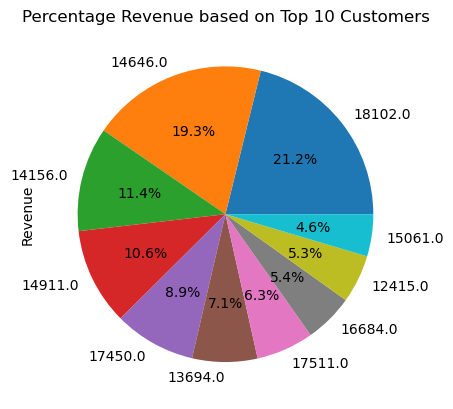

In [407]:
customerid_revenue.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Percentage Revenue based on Top 10 Customers')
plt.show()

### Count Invoice No's for each Customer ID

In [409]:
invoiceno_customerid = data_cleaned.groupby('Customer ID')['Invoice'].count().sort_values(ascending=False).head(10)
invoiceno_customerid

Customer ID
17841.0    12435
14911.0    11079
12748.0     6563
14606.0     6359
14096.0     5111
15311.0     4286
14156.0     4038
14646.0     3854
13089.0     3316
16549.0     3093
Name: Invoice, dtype: int64

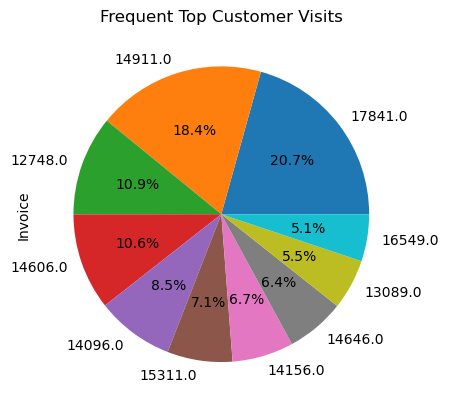

In [411]:
invoiceno_customerid.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Top Customer')
plt.show()

### Top 5 Customers Purchasing Behavior over Time

In [425]:
top_customers = data_cleaned['Customer ID'].value_counts().head(5)
top_customers

Customer ID
17841.0    12435
14911.0    11079
12748.0     6563
14606.0     6359
14096.0     5111
Name: count, dtype: int64

In [433]:
filtered_df = data_cleaned[data_cleaned['Customer ID'].isin(top_customers.index)]
filtered_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,Revenue
992,536521,22854,CREAM SWEETHEART EGG HOLDER,1,2010-12-01 12:48:00,4.95,12748.0,United Kingdom,2010,12,4.95
1367,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE,2010,12,39.80
1368,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE,2010,12,17.70
1369,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE,2010,12,15.30
1370,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE,2010,12,42.50
...,...,...,...,...,...,...,...,...,...,...,...
794585,536000,85040B,SET/4 BLUE FLOWER CANDLES IN BOWL,1,2010-11-29 14:13:00,1.65,14606.0,United Kingdom,2010,11,1.65
794586,536000,22178,VICTORIAN GLASS HANGING T-LIGHT,5,2010-11-29 14:13:00,1.25,14606.0,United Kingdom,2010,11,6.25
794587,536000,90214A,"LETTER ""A"" BLING KEY RING",1,2010-11-29 14:13:00,1.25,14606.0,United Kingdom,2010,11,1.25
794588,536000,90214C,"LETTER ""C"" BLING KEY RING",1,2010-11-29 14:13:00,1.25,14606.0,United Kingdom,2010,11,1.25


In [437]:
filtered_df = data_cleaned[data_cleaned['Customer ID'].isin(top_customers.index)]

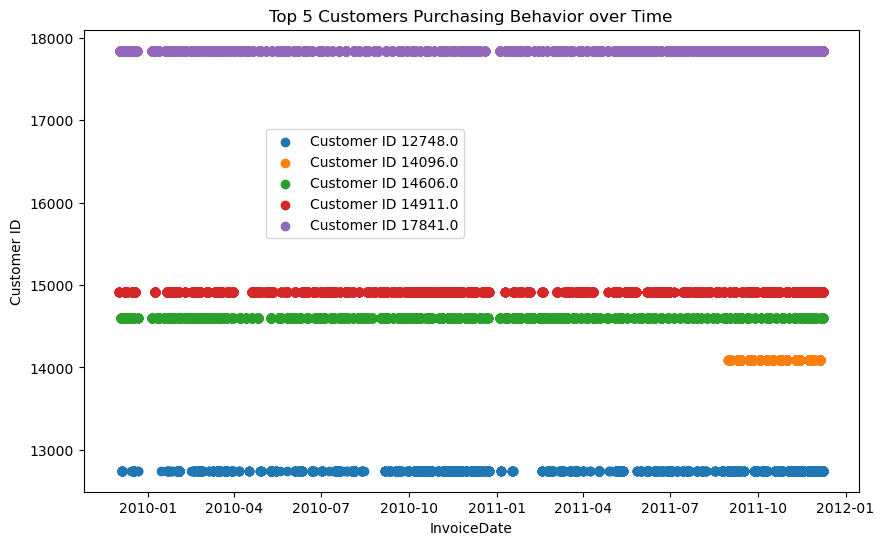

In [439]:
plt.figure(figsize=(10, 6))
for customer_id, group in filtered_df.groupby('Customer ID'):
    plt.scatter(group['InvoiceDate'], [customer_id] * len(group), label=f'Customer ID {customer_id}')

plt.xlabel('InvoiceDate')
plt.ylabel('Customer ID')
plt.title('Top 5 Customers Purchasing Behavior over Time')
plt.legend(loc='upper right', bbox_to_anchor=(0.5, 0.8))
plt.show()

### Group the data according to InvoiceYear and InvoiceMonth and get the total Revenue

In [441]:
invoicemonth_revenue = data_cleaned.groupby(['InvoiceYear', 'InvoiceMonth'])['Revenue'].sum().reset_index()
invoicemonth_revenue

,InvoiceYear,InvoiceMonth,Revenue
0,2009,12,683504.010
1,2010,1,555802.672
2,2010,2,504558.956
3,2010,3,696978.471
4,2010,4,591982.002
5,2010,5,597833.380
6,2010,6,636371.130
7,2010,7,589736.170
8,2010,8,602224.600
9,2010,9,829013.951


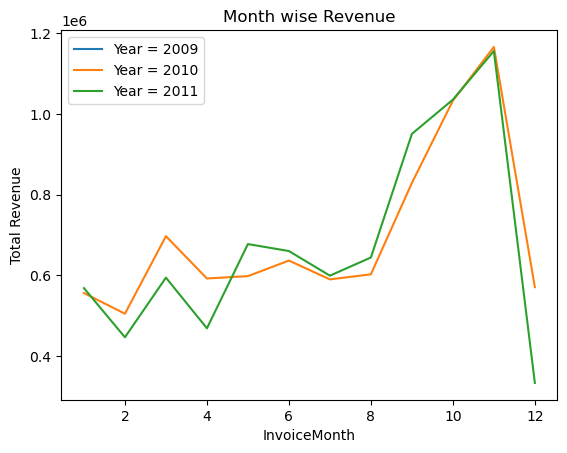

In [443]:
invoiceyears = invoicemonth_revenue['InvoiceYear'].unique()

for year in invoiceyears:
    data = invoicemonth_revenue[invoicemonth_revenue['InvoiceYear'] == year]
    colors = ['Green', 'Red']
    plt.plot(data['InvoiceMonth'], data['Revenue'], label = f'Year = {year}')

plt.xlabel('InvoiceMonth')
plt.ylabel('Total Revenue')
plt.title('Month wise Revenue')
plt.legend()
plt.show()

### Group the data according to InvoiceYear and Month and get the total quantity for each month

In [445]:
date_vs_quantity = data_cleaned.groupby(['InvoiceYear', 'InvoiceMonth'])['Quantity'].sum().reset_index()
date_vs_quantity

,InvoiceYear,InvoiceMonth,Quantity
0,2009,12,398708
1,2010,1,370128
2,2010,2,371871
3,2010,3,502101
4,2010,4,350604
5,2010,5,384960
6,2010,6,389880
7,2010,7,324638
8,2010,8,452551
9,2010,9,567806


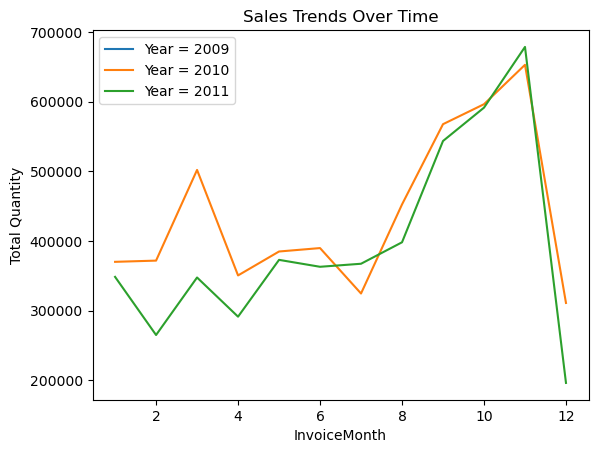

In [447]:
invoiceyears = date_vs_quantity['InvoiceYear'].unique()

for year in invoiceyears:
    data = date_vs_quantity[date_vs_quantity['InvoiceYear'] == year]
    colors = ['Blue', 'Red']
    plt.plot(data['InvoiceMonth'], data['Quantity'], label = f'Year = {year}')
    
plt.xlabel('InvoiceMonth')
plt.ylabel('Total Quantity')
plt.title('Sales Trends Over Time')
plt.legend()
plt.show()

In [449]:
customerid_vs_invoicedate = data_cleaned.groupby(['InvoiceYear', 'InvoiceMonth'])['Customer ID'].count().reset_index()
customerid_vs_invoicedate

,InvoiceYear,InvoiceMonth,Customer ID
0,2009,12,30279
1,2010,1,21461
2,2010,2,23042
3,2010,3,31783
4,2010,4,26834
5,2010,5,28233
6,2010,6,30691
7,2010,7,26644
8,2010,8,26030
9,2010,9,34131


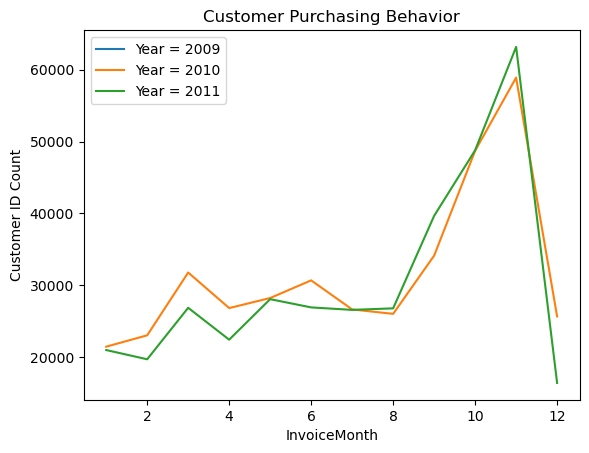

In [451]:
invoiceyears = date_vs_quantity['InvoiceYear'].unique()

for year in invoiceyears:
    data = customerid_vs_invoicedate[customerid_vs_invoicedate['InvoiceYear'] == year]
    plt.plot(data['InvoiceMonth'], data['Customer ID'], label = f'Year = {year}')
    
plt.xlabel('InvoiceMonth')
plt.ylabel('Customer ID Count')
plt.title('Customer Purchasing Behavior')
plt.legend()
plt.show()

## Quantity for each Top 10 Description

In [457]:
quantity_count = data_cleaned.groupby('Description')['Quantity'].count().sort_values(ascending=False).reset_index().head(10)
quantity_count

,Description,Quantity
0,WHITE HANGING HEART T-LIGHT HOLDER,5016
1,REGENCY CAKESTAND 3 TIER,3336
2,ASSORTED COLOUR BIRD ORNAMENT,2691
3,JUMBO BAG RED RETROSPOT,2640
4,PARTY BUNTING,2099
5,LUNCH BAG BLACK SKULL.,2044
6,REX CASH+CARRY JUMBO SHOPPER,1950
7,LUNCH BAG SPACEBOY DESIGN,1890
8,STRAWBERRY CERAMIC TRINKET BOX,1859
9,HOME BUILDING BLOCK WORD,1852


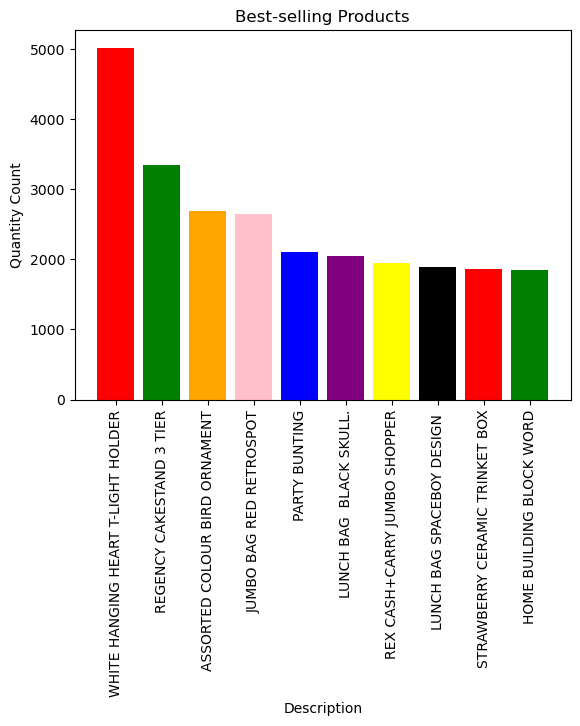

In [459]:
colors = ['Red', 'Green', 'Orange', 'Pink', 'Blue', 'Purple', 'Yellow', 'Black']
plt.bar(quantity_count['Description'], quantity_count['Quantity'], color = colors)
plt.xlabel('Description')
plt.ylabel('Quantity Count')
plt.title('Best-selling Products')
plt.xticks(rotation=90)
plt.show()

## Extracting Month and Year

In [461]:
# Convert InvoiceDate to datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34
...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,25.20
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,11,15.90
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,11,15.00
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,50.40


In [473]:
data_cleaned['YearMonth'] = data_cleaned['InvoiceDate'].dt.to_period('M')
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,Revenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,25.20,2010-11
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,11,15.90,2010-11
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,11,15.00,2010-11
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,50.40,2010-11


## Total revenue

In [475]:
data_cleaned['Revenue'] = data_cleaned['Quantity'] * data_cleaned['Price']
data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,Revenue,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,25.20,2010-11
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,11,15.90,2010-11
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,11,15.00,2010-11
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,50.40,2010-11


In [477]:
customer_revenue = data_cleaned.groupby('Customer ID')['Revenue'].sum()
customer_revenue

Customer ID
12346.0    77556.46
12347.0     4921.53
12348.0     2019.40
12349.0     4428.69
12350.0      334.40
             ...   
18283.0     2664.90
18284.0      461.68
18285.0      427.00
18286.0     1296.43
18287.0     4182.99
Name: Revenue, Length: 5880, dtype: float64

In [479]:
customer_revenue_sorted = customer_revenue.sort_values(ascending=False)
customer_revenue_sorted

Customer ID
18102.0    580517.60
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
             ...    
14095.0         2.95
16446.0         2.90
14827.0         0.00
13256.0         0.00
14103.0         0.00
Name: Revenue, Length: 5880, dtype: float64

## Top 20 customers

In [483]:
top_20_percent_customers = customer_revenue_sorted.head(20)
top_20_percent_customers

Customer ID
18102.0    580517.60
14646.0    528602.52
14156.0    313437.62
14911.0    291420.81
17450.0    244784.25
13694.0    195640.69
17511.0    172132.87
16684.0    147142.77
12415.0    144458.37
15061.0    126389.02
16029.0    117763.62
17949.0    117314.08
15311.0    114471.82
13089.0    113416.91
12931.0     92347.34
14298.0     91194.49
15769.0     88612.52
12346.0     77556.46
13798.0     75428.87
15838.0     73205.50
Name: Revenue, dtype: float64

## Monthly Sales

In [485]:
monthly_sales = data_cleaned.groupby('YearMonth')['Quantity'].sum()
monthly_sales

YearMonth
2009-12    398708
2010-01    370128
2010-02    371871
2010-03    502101
2010-04    350604
2010-05    384960
2010-06    389880
2010-07    324638
2010-08    452551
2010-09    567806
2010-10    596497
2010-11    653074
2010-12    311063
2011-01    348522
2011-02    265043
2011-03    347623
2011-04    291369
2011-05    372948
2011-06    363014
2011-07    367372
2011-08    398190
2011-09    543654
2011-10    591551
2011-11    678760
2011-12    196225
Freq: M, Name: Quantity, dtype: int64

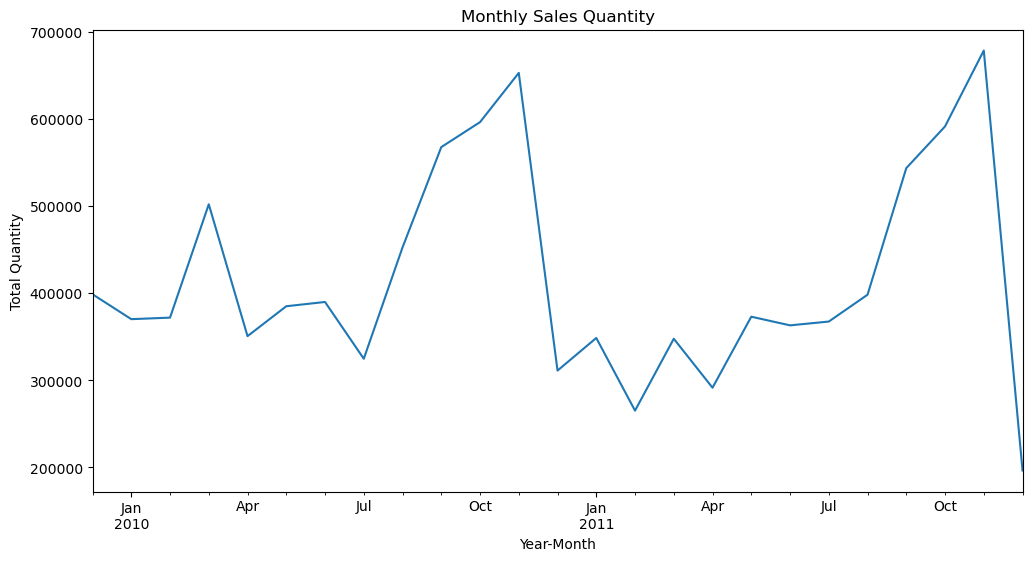

In [487]:
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title("Monthly Sales Quantity")
plt.xlabel("Year-Month")
plt.ylabel("Total Quantity")
plt.show()

In [489]:
data_cleaned = data_cleaned.copy()

# Convert InvoiceDate to datetime format
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned['Date'] = data_cleaned['InvoiceDate'].dt.date
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.to_period('M')
data_cleaned['Hour'] = data_cleaned['InvoiceDate'].dt.hour

data_cleaned

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYear,InvoiceMonth,Revenue,YearMonth,Date,Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,2010-12,2010-12-01,2010-12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12,2010-12-01,2010-12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,2010-12,2010-12-01,2010-12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12,2010-12-01,2010-12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2010-12,2010-12-01,2010-12,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797880,536364,21175,GIN + TONIC DIET METAL SIGN,12,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,25.20,2010-11,2010-11-30,2010-11,19
797881,536364,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-11-30 19:35:00,7.95,14441.0,United Kingdom,2010,11,15.90,2010-11,2010-11-30,2010-11,19
797882,536364,21098,CHRISTMAS TOILET ROLL,12,2010-11-30 19:35:00,1.25,14441.0,United Kingdom,2010,11,15.00,2010-11,2010-11-30,2010-11,19
797883,536364,21181,PLEASE ONE PERSON METAL SIGN,24,2010-11-30 19:35:00,2.10,14441.0,United Kingdom,2010,11,50.40,2010-11,2010-11-30,2010-11,19


## Daily sales

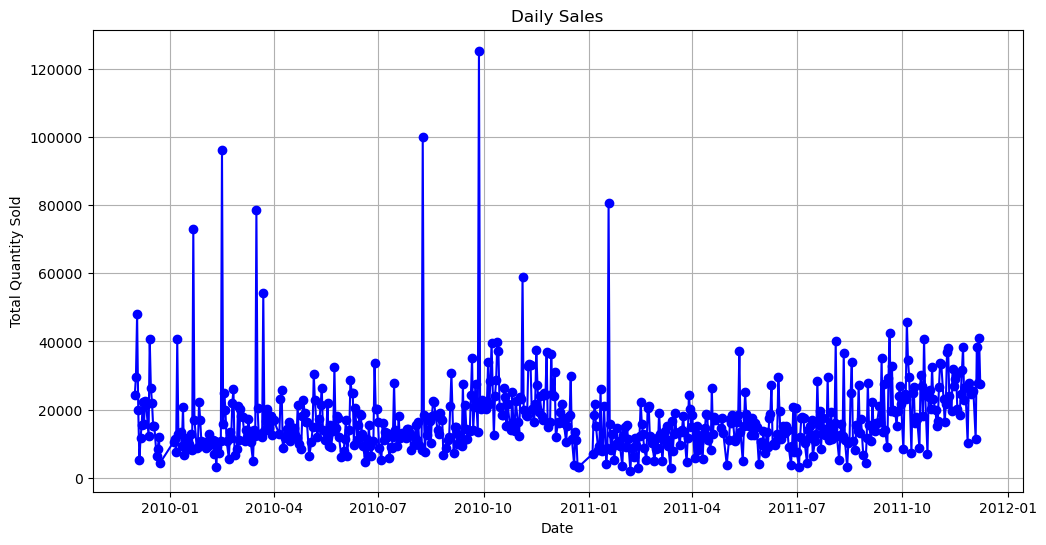

In [491]:
daily_sales = data_cleaned.groupby('Date')['Quantity'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot(color='blue', marker='o')
plt.title('Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.grid()
plt.show()

## Monthly sales

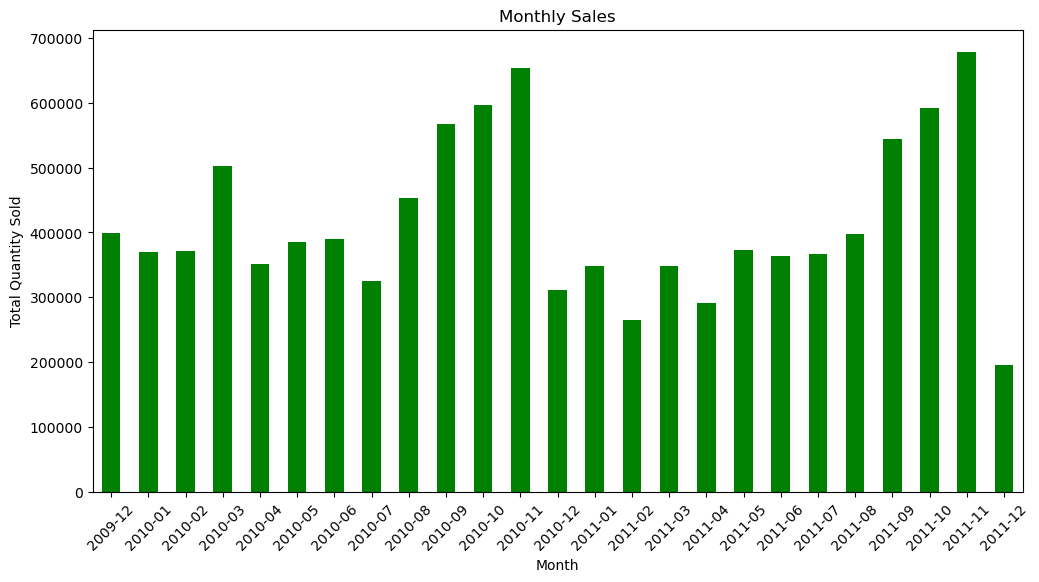

In [493]:
monthly_sales = data_cleaned.groupby('Month')['Quantity'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar', color='green')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


## Calculate hourly sales

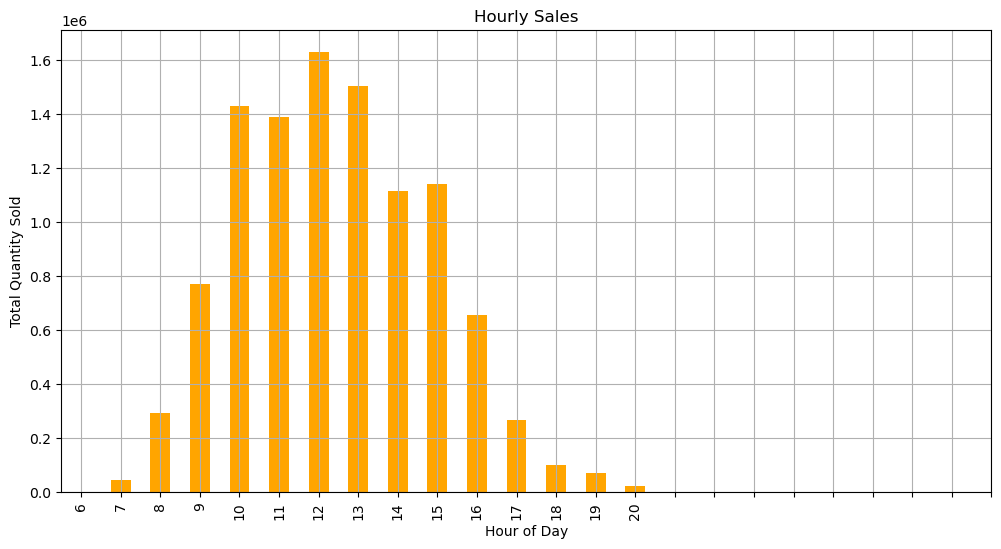

In [495]:
hourly_sales = data_cleaned.groupby('Hour')['Quantity'].sum()
plt.figure(figsize=(12, 6))
hourly_sales.plot(kind='bar', color='orange')
plt.title('Hourly Sales')
plt.xlabel('Hour of Day')
plt.ylabel('Total Quantity Sold')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Forecasting Part

In [536]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data_cleaned = pd.concat([sheet1, sheet2], ignore_index = True)

# Convert InvoiceDate to datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Create a Day column (day-level granularity)
data_cleaned['Day'] = data_cleaned['InvoiceDate'].dt.date

R2 Score (XGBoost): 0.6243
Mean Squared Error (MSE): 148847.8828
Mean Absolute Error (MAE): 73.0369
Root Mean Squared Error (RMSE): 385.8081


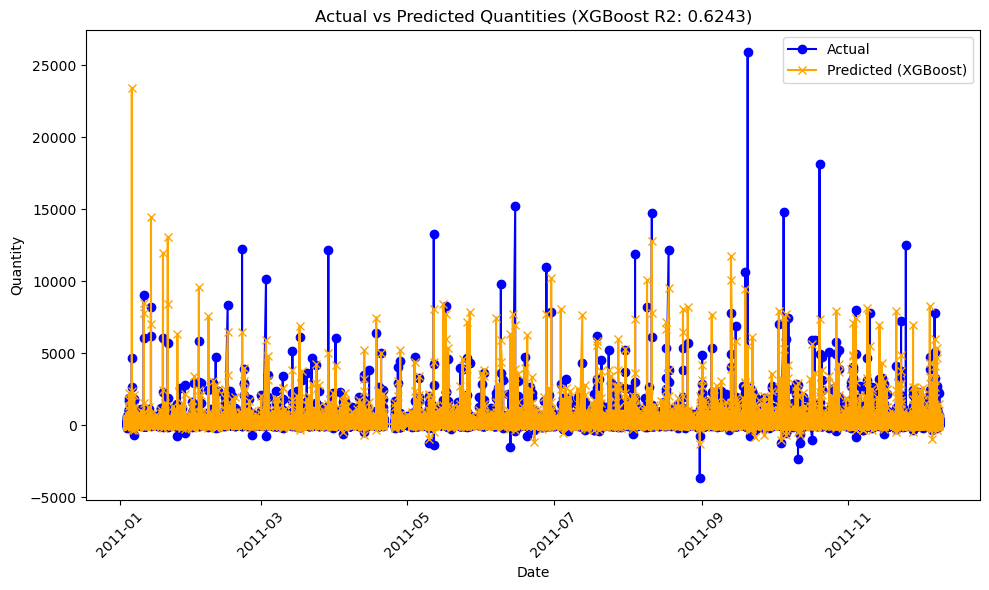

In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure the 'data_cleaned' DataFrame is a copy if necessary to avoid warnings
data_cleaned = data_cleaned.copy()

# Feature Engineering
data_cleaned.loc[:, 'TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['Price']
data_cleaned.loc[:, 'DayOfWeek'] = data_cleaned['InvoiceDate'].dt.dayofweek
data_cleaned.loc[:, 'Month'] = data_cleaned['InvoiceDate'].dt.month

# Ensure the 'Day' column is in datetime format
data_cleaned.loc[:, 'Day'] = pd.to_datetime(data_cleaned['Day'])

# Aggregate data
daily_data = data_cleaned.groupby(['Day', 'Customer ID']).agg({
    'Quantity': 'sum',
    'Price': 'mean',
    'TotalPrice': 'sum',
    'DayOfWeek': 'first',
    'Month': 'first'
}).reset_index()

# Convert the date string to a datetime object for splitting
split_date = pd.to_datetime('2011-01-01')

# Train-test split (time-based)
train = daily_data[daily_data['Day'] < split_date]
test = daily_data[daily_data['Day'] >= split_date]

# Separate features and target
X_train = train.drop(['Day', 'Quantity'], axis=1)
y_train = train['Quantity']
X_test = test.drop(['Day', 'Quantity'], axis=1)
y_test = test['Quantity']

# Normalize features (optional for XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Print metrics
print(f"R2 Score (XGBoost): {r2_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(test['Day'], y_test, label="Actual", marker='o', color='blue')
plt.plot(test['Day'], y_pred_xgb, label="Predicted (XGBoost)", marker='x', color='orange')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title(f"Actual vs Predicted Quantities (XGBoost R2: {r2_xgb:.4f})")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [542]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data_cleaned = pd.concat([sheet1, sheet2], ignore_index = True)


data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

data_cleaned['Day'] = data_cleaned['InvoiceDate'].dt.date

data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['Price']
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.dayofweek
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned['Day'] = pd.to_datetime(data_cleaned['Day'])  # Ensure Day is in datetime format

daily_data = data_cleaned.groupby(['Day', 'Customer ID']).agg({
    'Quantity': 'sum',
    'Price': 'mean',
    'TotalPrice': 'sum',
    'DayOfWeek': 'first',
    'Month': 'first'
}).reset_index()

daily_data

,Day,Customer ID,Quantity,Price,TotalPrice,DayOfWeek,Month
0,2009-12-01,12362.0,1,130.000000,130.00,1,12
1,2009-12-01,12490.0,442,2.888571,603.94,1,12
2,2009-12-01,12533.0,484,3.159773,929.92,1,12
3,2009-12-01,12615.0,-1,5.950000,-5.95,1,12
4,2009-12-01,12636.0,1,141.000000,141.00,1,12
...,...,...,...,...,...,...,...
38497,2011-12-09,17428.0,56,7.666667,415.60,4,12
38498,2011-12-09,17490.0,462,1.882727,730.70,4,12
38499,2011-12-09,17581.0,516,2.194571,984.68,4,12
38500,2011-12-09,17754.0,405,0.644167,200.99,4,12


R2 Score: 0.6364
Mean Squared Error (MSE): 148967.3749
Mean Absolute Error (MAE): 73.6170
Root Mean Squared Error (RMSE): 385.9629


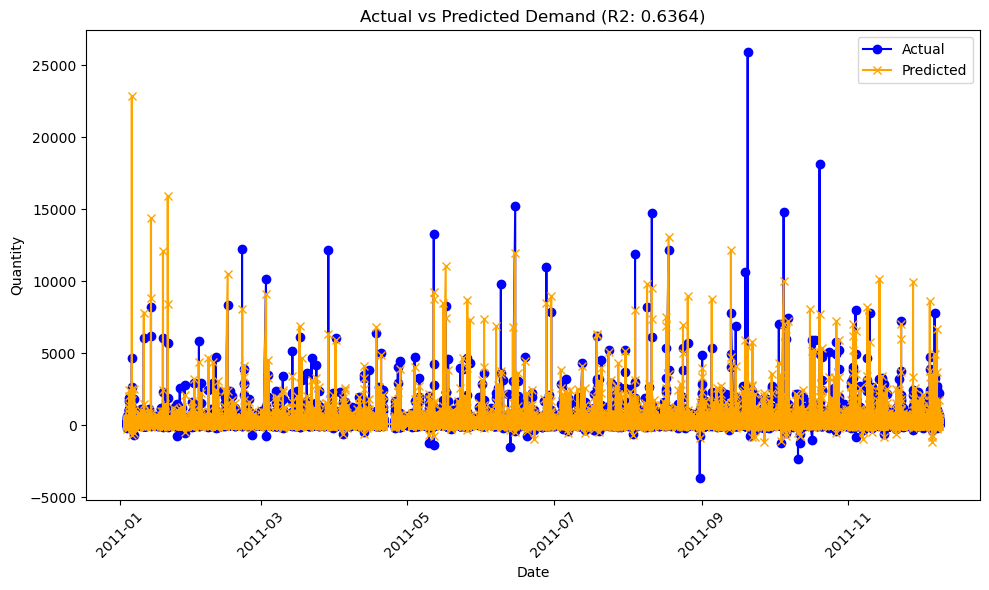

In [544]:
# Create lag features (previous day's demand for the same customer)
daily_data['PrevQuantity'] = daily_data.groupby('Customer ID')['Quantity'].shift(1)

# Drop rows with missing previous quantity
daily_data.dropna(subset=['PrevQuantity'], inplace=True)

# Define target variable and features
X = daily_data.drop(['Quantity', 'Day'], axis=1)
y = daily_data['Quantity']

# Train-test split (time-based split)
train = daily_data[daily_data['Day'] < '2011-01-01']
test = daily_data[daily_data['Day'] >= '2011-01-01']

# Separate features and target for train and test
X_train = train.drop(['Quantity', 'Day'], axis=1)
y_train = train['Quantity']
X_test = test.drop(['Quantity', 'Day'], axis=1)
y_test = test['Quantity']

# Standardize the features (optional, but beneficial for models like XGBoost)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training using XGBoost
xgb_model = XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation Metrics
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

# Print metrics
print(f"R2 Score: {r2_xgb:.4f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")

# Visualizing actual vs predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test['Day'], y_test, label="Actual", color='blue', marker='o')
plt.plot(test['Day'], y_pred_xgb, label="Predicted", color='orange', marker='x')
plt.xlabel("Date")
plt.ylabel("Quantity")
plt.title(f"Actual vs Predicted Demand (R2: {r2_xgb:.4f})")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [562]:
train

,Day,Customer ID,Quantity,Price,TotalPrice,DayOfWeek,Month,PrevQuantity
161,2009-12-02,15061.0,280,2.550000,714.00,2,12,1862.0
163,2009-12-02,15311.0,48,3.500000,168.00,2,12,326.0
212,2009-12-02,17998.0,183,2.030909,89.59,2,12,107.0
221,2009-12-03,12921.0,508,2.774828,993.00,3,12,273.0
222,2009-12-03,12931.0,75,1.450000,108.75,3,12,800.0
...,...,...,...,...,...,...,...,...
20604,2010-12-23,15587.0,120,2.960000,344.88,3,12,48.0
20605,2010-12-23,15856.0,381,3.388000,939.07,3,12,266.0
20606,2010-12-23,17069.0,-6,1.900000,-13.50,3,12,129.0
20607,2010-12-23,17581.0,-6,2.950000,-17.70,3,12,882.0


In [564]:
test

,Day,Customer ID,Quantity,Price,TotalPrice,DayOfWeek,Month,PrevQuantity
20609,2011-01-04,12483.0,292,6.964286,507.56,1,1,101.0
20610,2011-01-04,12957.0,352,2.968621,413.68,1,1,597.0
20611,2011-01-04,13094.0,72,1.060000,76.32,1,1,384.0
20612,2011-01-04,13253.0,624,1.851250,476.48,1,1,560.0
20613,2011-01-04,13313.0,171,2.237647,307.30,1,1,129.0
...,...,...,...,...,...,...,...,...
38497,2011-12-09,17428.0,56,7.666667,415.60,4,12,340.0
38498,2011-12-09,17490.0,462,1.882727,730.70,4,12,-28.0
38499,2011-12-09,17581.0,516,2.194571,984.68,4,12,998.0
38500,2011-12-09,17754.0,405,0.644167,200.99,4,12,410.0


In [552]:
X_train

,Customer ID,Price,TotalPrice,DayOfWeek,Month,PrevQuantity
161,15061.0,2.550000,714.00,2,12,1862.0
163,15311.0,3.500000,168.00,2,12,326.0
212,17998.0,2.030909,89.59,2,12,107.0
221,12921.0,2.774828,993.00,3,12,273.0
222,12931.0,1.450000,108.75,3,12,800.0
...,...,...,...,...,...,...
20604,15587.0,2.960000,344.88,3,12,48.0
20605,15856.0,3.388000,939.07,3,12,266.0
20606,17069.0,1.900000,-13.50,3,12,129.0
20607,17581.0,2.950000,-17.70,3,12,882.0


In [554]:
y_train

161      280
163       48
212      183
221      508
222       75
        ... 
20604    120
20605    381
20606     -6
20607     -6
20608    178
Name: Quantity, Length: 16196, dtype: int64

In [556]:
X_test

,Customer ID,Price,TotalPrice,DayOfWeek,Month,PrevQuantity
20609,12483.0,6.964286,507.56,1,1,101.0
20610,12957.0,2.968621,413.68,1,1,597.0
20611,13094.0,1.060000,76.32,1,1,384.0
20612,13253.0,1.851250,476.48,1,1,560.0
20613,13313.0,2.237647,307.30,1,1,129.0
...,...,...,...,...,...,...
38497,17428.0,7.666667,415.60,4,12,340.0
38498,17490.0,1.882727,730.70,4,12,-28.0
38499,17581.0,2.194571,984.68,4,12,998.0
38500,17754.0,0.644167,200.99,4,12,410.0


In [558]:
y_test

20609    292
20610    352
20611     72
20612    624
20613    171
        ... 
38497     56
38498    462
38499    516
38500    405
38501    144
Name: Quantity, Length: 16364, dtype: int64

In [560]:
y_pred_xgb

array([118.63755, 227.42279,  73.1434 , ..., 693.0705 , 422.6637 ,
       170.20747], dtype=float32)

In [31]:
import pandas as pd

# Load the dataset (replace with actual file path or DataFrame)
# Read both sheets and concatenate them
sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data = pd.concat([sheet1, sheet2], ignore_index=True)
df = pd.DataFrame(data)

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Extract only the date part from InvoiceDate
df["InvoiceDate"] = df["InvoiceDate"].dt.date

# Group by StockCode and InvoiceDate, summing Quantity
grouped = df.groupby(["StockCode", "InvoiceDate"])["Quantity"].sum().reset_index()

# Ensure quantities are integers
grouped["Quantity"] = grouped["Quantity"].astype(int)

# Pivot to create the desired format
pivot = grouped.pivot(index="StockCode", columns="InvoiceDate", values="Quantity").fillna(0)

# Ensure the pivot table has integer values
pivot = pivot.astype(int)

# Rename columns to Day1, Day2, ..., Dayn
pivot.columns = [f"Day{i+1}" for i in range(len(pivot.columns))]

# Reset index to include StockCode as a column
pivot.reset_index(inplace=True)

# Display the resulting DataFrame
pivot

# Save to an Excel file if needed
# pivot.to_excel("output_online_retail_II.xlsx", index=False)


,StockCode,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day595,Day596,Day597,Day598,Day599,Day600,Day601,Day602,Day603,Day604
0,10002,12,0,7,73,0,49,2,12,0,...,0,0,0,0,0,0,0,0,0,0
1,10080,0,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10109,0,0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10120,60,10,0,30,0,0,0,1,1,...,0,4,0,0,6,0,0,0,0,0
4,10125,5,0,0,46,0,8,20,1,22,...,0,0,0,0,6,0,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5300,gift_0001_60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5301,gift_0001_70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5302,gift_0001_80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5303,gift_0001_90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import pandas as pd

# Load the dataset (replace with actual file path or DataFrame)
sheet1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
sheet2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data = pd.concat([sheet1, sheet2], ignore_index=True)
df = pd.DataFrame(data)

# Convert InvoiceDate to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Extract only the date part from InvoiceDate
df["InvoiceDate"] = df["InvoiceDate"].dt.date

# Group by StockCode and InvoiceDate, summing Quantity
grouped = df.groupby(["StockCode", "InvoiceDate"])["Quantity"].sum().reset_index()

# Ensure quantities are integers
grouped["Quantity"] = grouped["Quantity"].astype(int)

# Pivot to create the desired format
pivot = grouped.pivot(index="StockCode", columns="InvoiceDate", values="Quantity").fillna(0)

# Ensure the pivot table has integer values
pivot = pivot.astype(int)

# Rename columns to Day1, Day2, ..., Dayn
pivot.columns = [f"Day{i+1}" for i in range(len(pivot.columns))]

# Reset index to include StockCode as a column
pivot.reset_index(inplace=True)

# Determine the total number of days
total_days = len(pivot.columns) - 1  # Exclude 'StockCode'

# Number of days to forecast
forecast_days = 60

# Split into train and test datasets
train = pivot.iloc[:, :-forecast_days]  # All columns except the last 60 days
test = pivot.iloc[:, -forecast_days:]  # Last 60 days for testing

# Rename test columns with their original names (e.g., Day545, Day546, ..., Day605)
test.columns = pivot.columns[-forecast_days:]

# Add the StockCode column to the test dataset
test = pd.concat([pivot[['StockCode']], test], axis=1)

# Display results
print("Train Dataset:")
print(train.head())

print("\nTest Dataset:")
print(test.head())


Train Dataset:
  StockCode  Day1  Day2  Day3  Day4  Day5  Day6  Day7  Day8  Day9  ...  \
0     10002    12     0     7    73     0    49     2    12     0  ...   
1     10080     0     1     0     3     0     0     0     0     0  ...   
2     10109     0     0     4     0     0     0     0     0     0  ...   
3     10120    60    10     0    30     0     0     0     1     1  ...   
4     10125     5     0     0    46     0     8    20     1    22  ...   

   Day535  Day536  Day537  Day538  Day539  Day540  Day541  Day542  Day543  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0      12       0       0   
2       0       0       0       0       0       0       0       0       0   
3       1       0       0       0       0       0       5       1       0   
4       0       0       0       0       0       0       0      40       0   

   Day544  
0       0  
1       0  
2       0  
3       0  
4     150  

[5 r

In [43]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Transpose the datasets (days as rows and stockcodes as columns)
train_t = train.set_index('StockCode').transpose()
test_t = test.set_index('StockCode').transpose()

# Scale the data to [0, 1] range using MinMaxScaler for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_t.values)
test_scaled = scaler.transform(test_t.values)

# Function to prepare data for LSTM (convert to 3D array)
def prepare_data(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

# Prepare the train and test data for LSTM
time_step = 1  # You can try different values for time_step
X_train, y_train = prepare_data(train_scaled, time_step)
X_test, y_test = prepare_data(test_scaled, time_step)

# Reshaping the data to be compatible with LSTM (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))  # Forecasting a single value for each stockcode

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions using the model
y_pred = model.predict(X_test)

# Assuming scaler was fitted on the full dataset, let's reshape and inverse transform the entire data
y_pred_full_inverse = scaler.inverse_transform(y_pred)  # Inverse transform entire predicted dataset
y_test_full_inverse = scaler.inverse_transform(y_test)  # Inverse transform entire test dataset

# Now you can extract the inverse transformed predictions for each stock code
y_pred_inverse = []
y_test_inverse = []

# Extract predictions and actual values for each stock code
for i in range(y_pred.shape[1]):
    y_pred_inverse_stock = y_pred_full_inverse[:, i].reshape(-1, 1)
    y_test_inverse_stock = y_test_full_inverse[:, i].reshape(-1, 1)
    
    y_pred_inverse.append(y_pred_inverse_stock)
    y_test_inverse.append(y_test_inverse_stock)

# Convert lists to numpy arrays and reshape them back to the correct shape
y_pred_inverse = np.array(y_pred_inverse).squeeze(axis=-1).T  # Reshape back to correct shape
y_test_inverse = np.array(y_test_inverse).squeeze(axis=-1).T  # Reshape back to correct shape

# Calculate RMSE, MSE, MAE, and R2 score for each stock code
rmse = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Output the results
print(f"RMSE: {rmse}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")


Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.8277 
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1674
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1634
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1586
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1537
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1490
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1445
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1397
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1358
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1323
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


ValueError: non-broadcastable output operand with shape (59,1) doesn't match the broadcast shape (59,5305)